In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_10lac
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [2]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df.company = label.fit_transform(df.company)

In [3]:
df.degree = label.fit_transform(df.degree)

In [4]:
df.job = label.fit_transform(df.job)

In [5]:
df

,company,job,degree,salary_more_then_10lac
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [6]:
x = df.drop("salary_more_then_10lac",axis = 1)

In [7]:
y = df.salary_more_then_10lac

In [8]:
x.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
clf.predict([[2,2,1]])

array([0], dtype=int64)

In [11]:
clf.score(x,y)

1.0

In [12]:
df1 = pd.read_csv("titanic_1.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


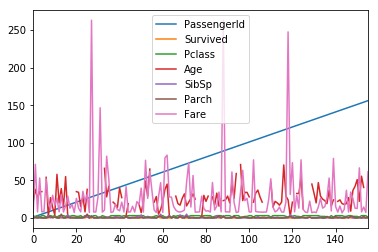

In [13]:
df1.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A69D342630>,
      dtype=object)

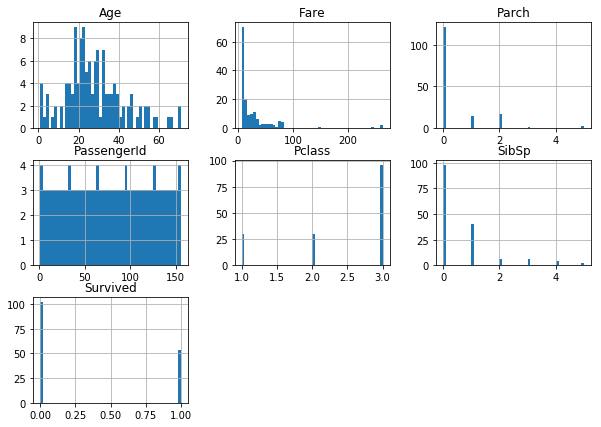

In [14]:
df1.hist(bins=50,figsize=(10,7))

In [15]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
pclass = pd.get_dummies(df1.Pclass,drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [17]:
gender = pd.get_dummies(df1.Sex,drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
em = pd.get_dummies(df1.Embarked,drop_first=True)
em.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
final = pd.concat([df1,pclass,gender,em],axis = 1)
final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,0,1


In [20]:
c_final = final.drop(["PassengerId","Pclass","Name","Sex","Ticket","Cabin","Embarked"],axis = 1)
c_final.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [21]:
c_final.Age.median()

26.0

In [22]:
c_final.Age = c_final.Age.fillna(c_final.Age.median())

In [23]:
c_final.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A69CE41860>,
      dtype=object)

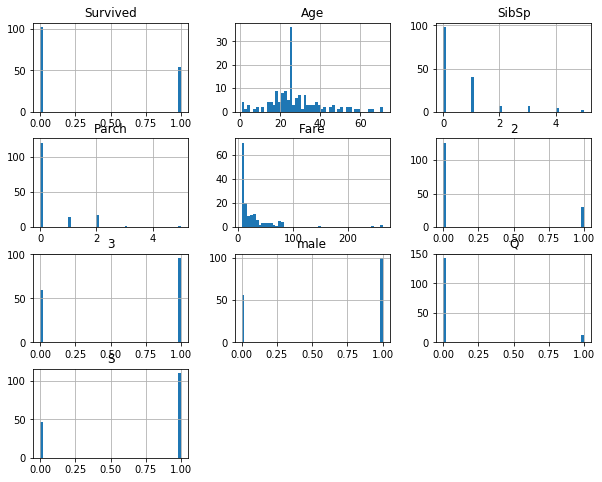

In [24]:
c_final.hist(bins = 50,figsize=(10,8))

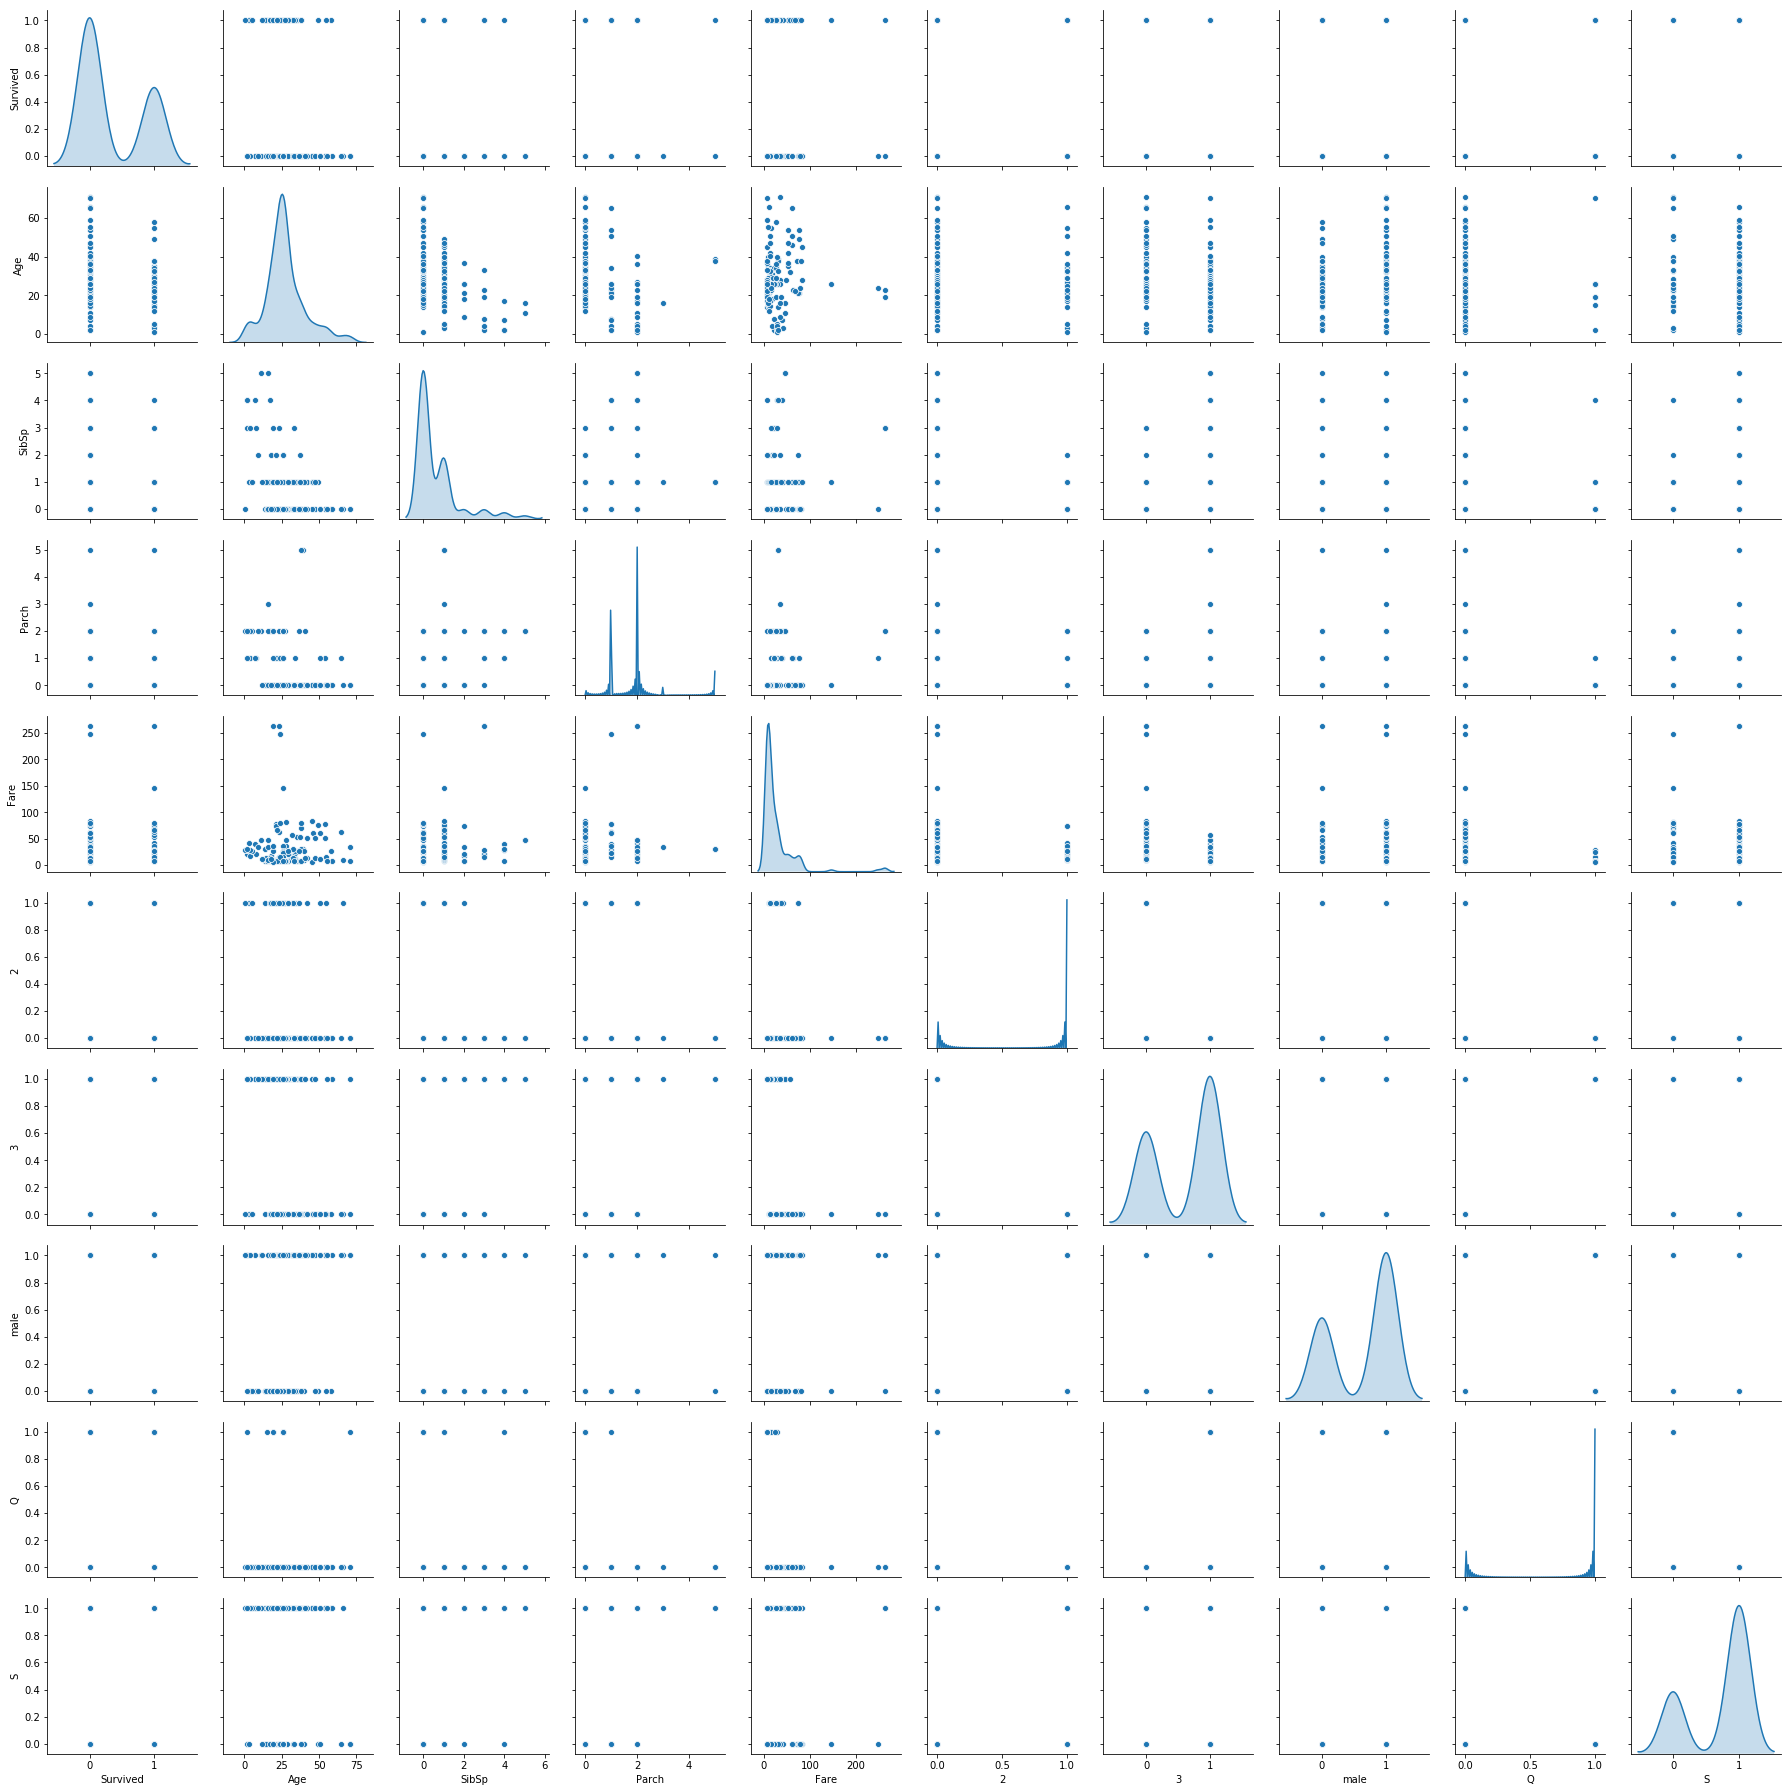

In [25]:
import seaborn as sn
sn.pairplot(c_final,diag_kind="kde")

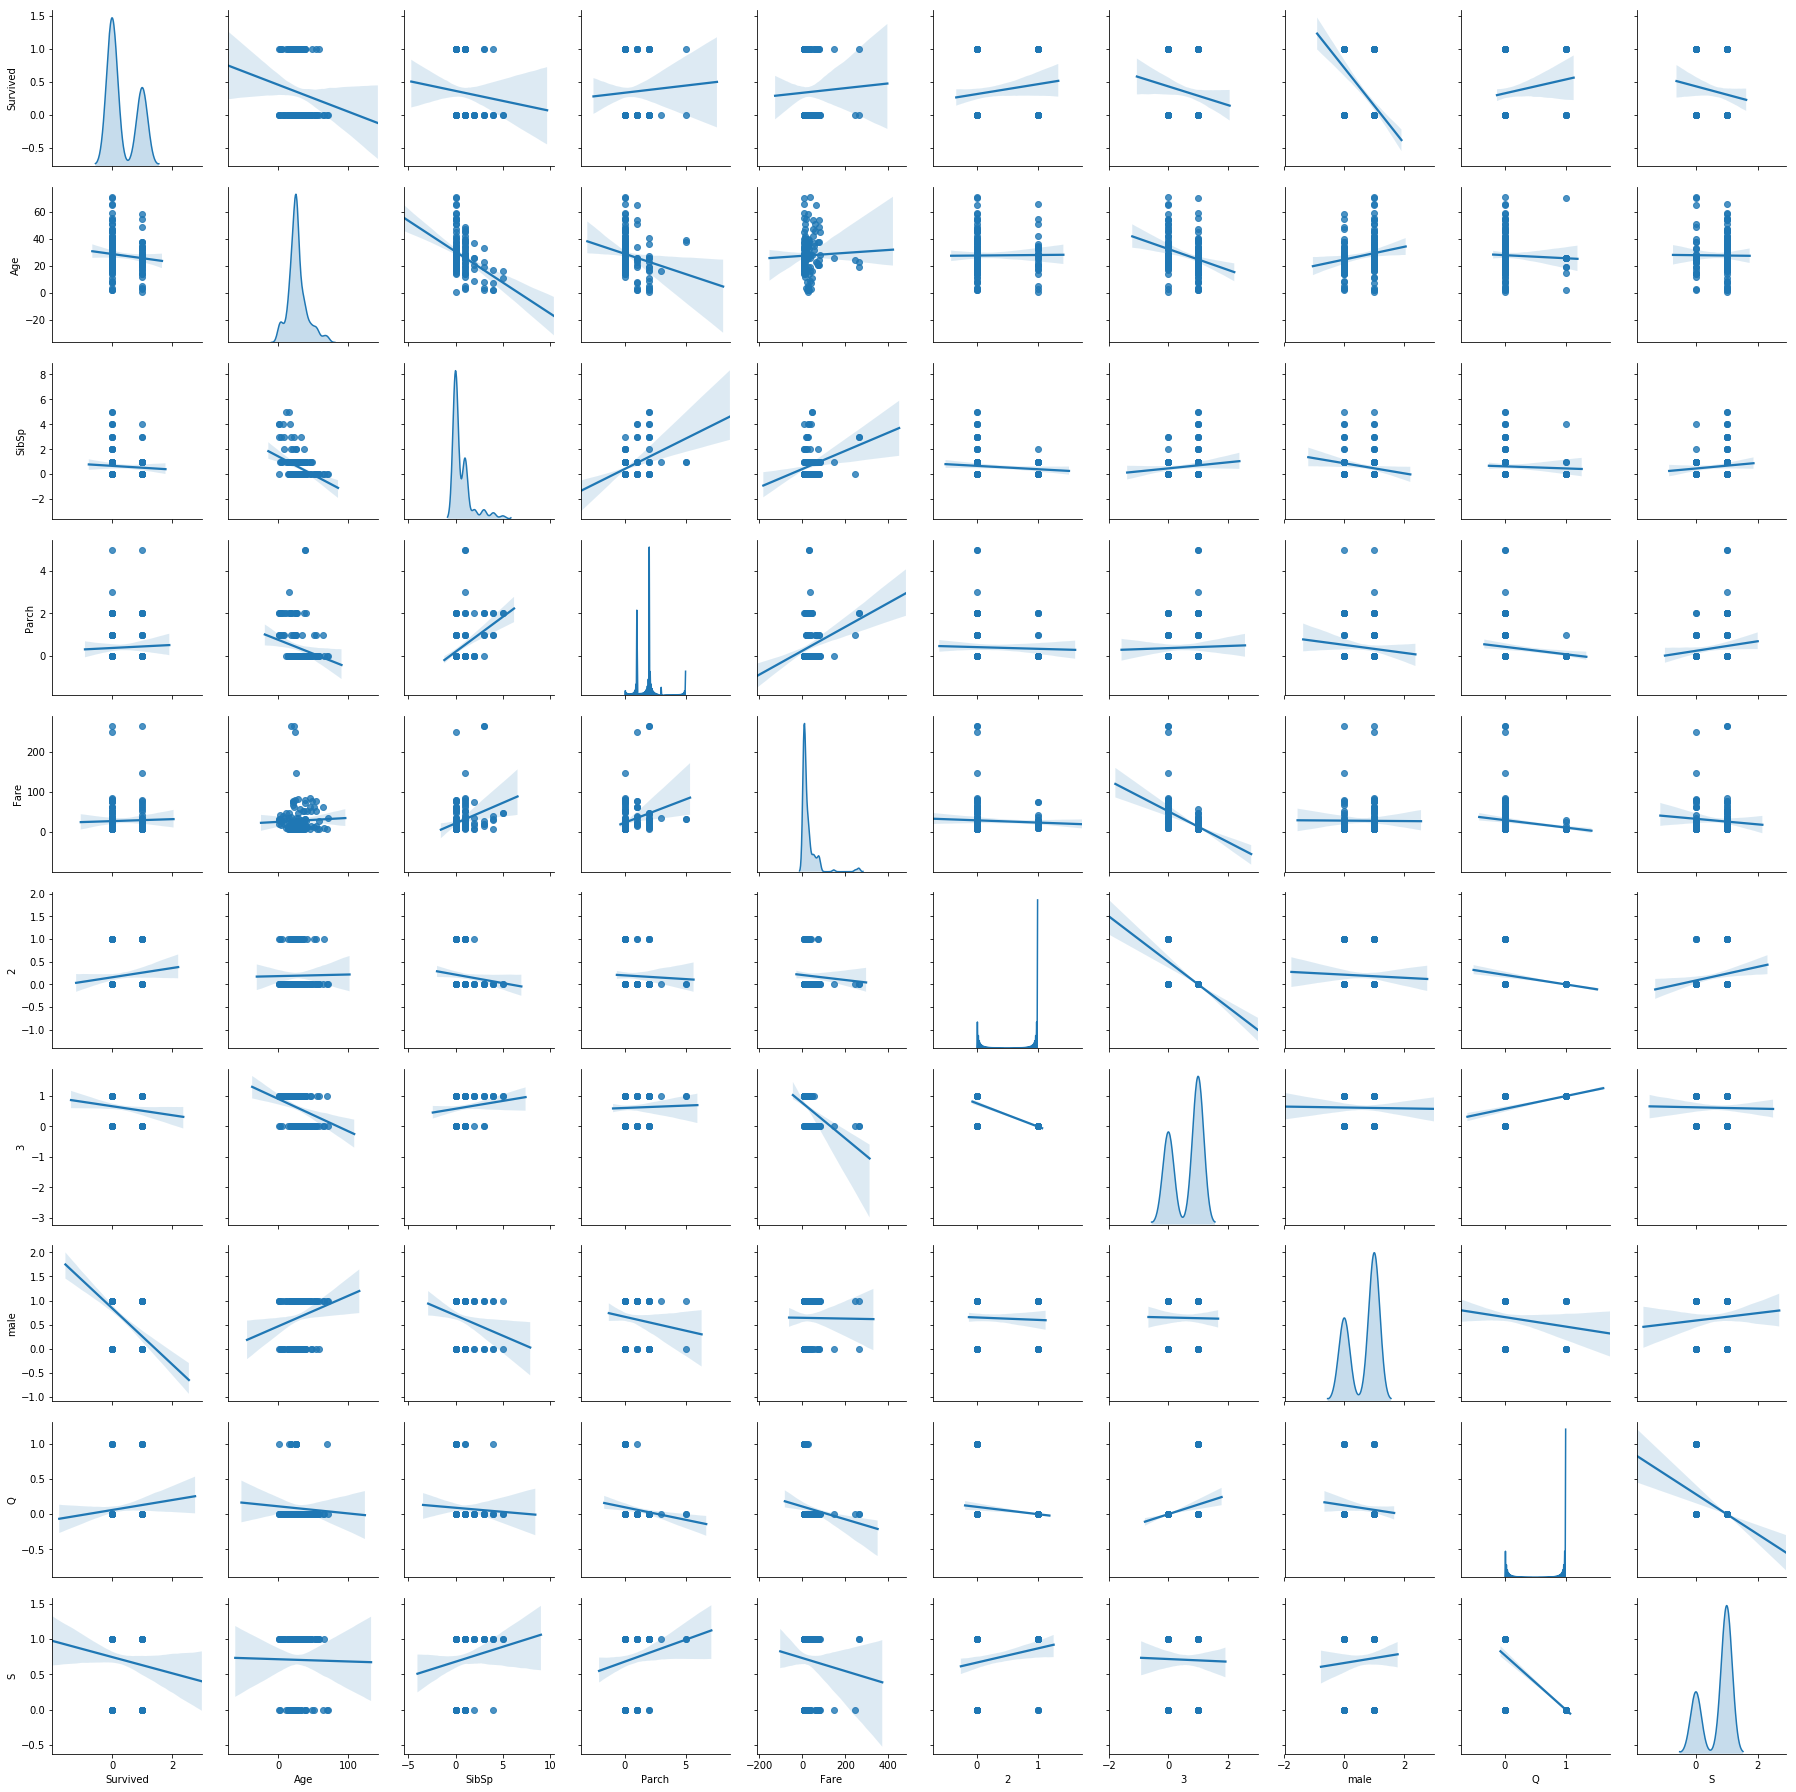

In [26]:
sn.pairplot(c_final,diag_kind="kde",kind = "reg")

In [27]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


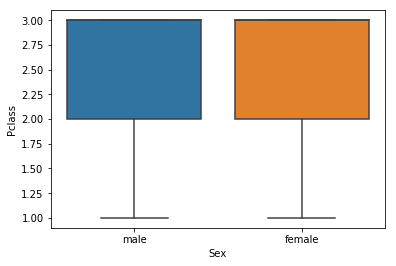

In [28]:
sn.boxplot(y= df1.Pclass,x = df1.Sex)

In [29]:
c_final.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


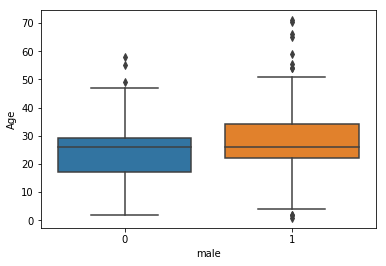

In [30]:
sn.boxplot(x = c_final.male,y = c_final.Age)

In [31]:
c_final.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [32]:
x= c_final.drop("Survived",axis = 1)
y = c_final.Survived

In [33]:
x.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [35]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
yp = model.predict(x_test)
yp

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [37]:
model.score(x_train,y_train)

1.0

In [38]:
model.score(x_test,y_test)

0.71875

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yp)
cm

array([[16,  7],
       [ 2,  7]], dtype=int64)

Text(33,0.5,'TRUTH')

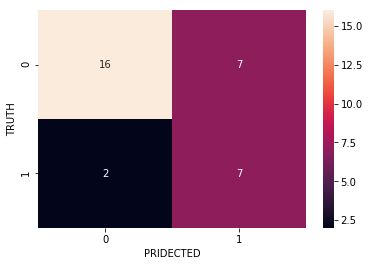

In [40]:
sn.heatmap(cm,annot =True,linecolor="black")
plt.xlabel("PRIDECTED")
plt.ylabel("TRUTH")


In [41]:
from sklearn.metrics import classification_report,accuracy_score

In [42]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        23
           1       0.50      0.78      0.61         9

   micro avg       0.72      0.72      0.72        32
   macro avg       0.69      0.74      0.69        32
weighted avg       0.78      0.72      0.73        32



In [43]:
print(accuracy_score(y_test,yp))

0.71875
